In [1]:
import pandas as pd 
import spacy

/gscratch/scrubbed/mjilg/jupyter-notebook/lib/python3.9/site-packages/torch/cuda/__init__.py:734: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
import re

In [3]:
import nltk
from nltk.tokenize import sent_tokenize
#nltk.download('punkt_tab')

In [4]:
nlp = spacy.load("en_core_web_sm")

In [6]:
phab_path = "/mmfs1/gscratch/comdata/users/mjilg/mw-repo-lifecycles/case1/0228_ve_phab_comments.csv"
phab_df = pd.read_csv(phab_path)

In [7]:
#cleaning df 
phab_df['has_ref'] = phab_df['comment_text'].apply(lambda x: bool(re.search(r"\b(visualeditor|VE|ve|VisualEditor)\b", str(x), re.IGNORECASE)))
phab_df['has_bot_ref'] = phab_df['comment_text'].apply(lambda x: bool(re.search(r"\b(bots|scripts|gadgets)\b", str(x), re.IGNORECASE)))
phab_df['timestamp'] = pd.to_datetime(phab_df['date_created'], unit='s', origin='unix', utc=True)
phab_df['comment_id'] = phab_df.index + 1
# after 11-1-2012 before 11-1-2013
filtered_phab_df = phab_df[(phab_df['date_created'] < 1383264000) & (phab_df['date_created'] > 1351728000)]

In [8]:
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

In [9]:
#turning df into sentences 
sentence_level_data = filtered_phab_df.explode(
    'comment_text').reset_index(drop=True)

sentence_level_data['sentence'] = sentence_level_data['comment_text'].apply(
    lambda x: sent_tokenize(str(x)))

sentence_level_data = sentence_level_data.explode('sentence').reset_index(drop=True)

sentence_level_data['sentence_id'] = sentence_level_data.groupby('comment_id').cumcount() + 1

sentence_level_data = sentence_level_data.drop(columns=['has_bot_ref', 'has_ref'], errors='ignore')

sentence_level_data['has_ref'] = sentence_level_data['sentence'].apply(
    lambda x: bool(re.search(r'\b(visualeditor|VE|ve|VisualEditor)\b', x)))

sentence_level_data['has_bot_ref'] = sentence_level_data['sentence'].apply(
    lambda x: bool(re.search(r'\b(bots|scripts|gadgets)\b', x)))

sentence_level_data = sentence_level_data.reset_index(drop=True)


In [10]:
sentence_level_data['sentence_no_url'] = sentence_level_data['sentence'].apply(
    lambda x: remove_urls(str(x)) if x else []
)
sentence_level_data

task_title  \
0      VisualEditor: [Regression] "More" menu gets sh...   
1      VisualEditor: [Regression] "More" menu gets sh...   
2      VisualEditor: [Regression] "More" menu gets sh...   
3      VisualEditor: [Regression] "More" menu gets sh...   
4      VisualEditor: [Regression] "More" menu gets sh...   
...                                                  ...   
32483  Implement minification for SVG files in Resour...   
32484  Implement minification for SVG files in Resour...   
32485  Implement minification for SVG files in Resour...   
32486  Implement minification for SVG files in Resour...   
32487  Implement minification for SVG files in Resour...   

                                            comment_text  date_created  \
0      Tested on both the Italian and the English Wik...    1380976920   
1      Tested on both the Italian and the English Wik...    1380976920   
2      Note that this is fixed and has been deployed ...    1381281033   
3      Note that this is fixed and has been deployed ...    1381281033   
4      Change 88226 merged by Robmoen:\nThe amazing m...    1381274919   
...                                                  ...           ...   
32483  I think we can apply the same as PNG files.\n\...    1362551377   
32484  I think we can apply the same as PNG files.\n\...    1362551377   
32485  I think we can apply the same as PNG files.\n\...    1362551377   
32486  I think we can apply the same as PNG files.\n\...    1362551377   
32487  I think we can apply the same as PNG files.\n\...    1362551377   

                           AuthorPHID  WMFaffil  \
0      PHID-USER-wil4b5lylrvf3krixlkl      True   
1      PHID-USER-wil4b5lylrvf3krixlkl      True   
2      PHID-USER-ydswvwhh5pm4lshahjje      True   
3      PHID-USER-ydswvwhh5pm4lshahjje      True   
4      PHID-USER-idceizaw6elwiwm5xshb      True   
...                               ...       ...   
32483  PHID-USER-sai77mtxmpqnm6pycyvz     False   
32484  PHID-USER-sai77mtxmpqnm6pycyvz     False   
32485  PHID-USER-sai77mtxmpqnm6pycyvz     False   
32486  PHID-USER-sai77mtxmpqnm6pycyvz     False   
32487  PHID-USER-sai77mtxmpqnm6pycyvz     False   

                             TaskPHID      comment_type    status  \
0      PHID-TASK-64s56xzrc22ustp2z7wx  task_description  resolved   
1      PHID-TASK-64s56xzrc22ustp2z7wx  task_description  resolved   
2      PHID-TASK-64s56xzrc22ustp2z7wx   task_subcomment       NaN   
3      PHID-TASK-64s56xzrc22ustp2z7wx   task_subcomment       NaN   
4      PHID-TASK-64s56xzrc22ustp2z7wx   task_subcomment       NaN   
...                               ...               ...       ...   
32483  PHID-TASK-s5at4xy2rbu4kz3beaqh   task_subcomment       NaN   
32484  PHID-TASK-s5at4xy2rbu4kz3beaqh   task_subcomment       NaN   
32485  PHID-TASK-s5at4xy2rbu4kz3beaqh   task_subcomment       NaN   
32486  PHID-TASK-s5at4xy2rbu4kz3beaqh   task_subcomment       NaN   
32487  PHID-TASK-s5at4xy2rbu4kz3beaqh   task_subcomment       NaN   

                      timestamp  comment_id  \
0     2013-10-05 12:42:00+00:00         709   
1     2013-10-05 12:42:00+00:00         709   
2     2013-10-09 01:10:33+00:00         710   
3     2013-10-09 01:10:33+00:00         710   
4     2013-10-08 23:28:39+00:00         711   
...                         ...         ...   
32483 2013-03-06 06:29:37+00:00       32338   
32484 2013-03-06 06:29:37+00:00       32338   
32485 2013-03-06 06:29:37+00:00       32338   
32486 2013-03-06 06:29:37+00:00       32338   
32487 2013-03-06 06:29:37+00:00       32338   

                                                sentence  sentence_id  \
0      Tested on both the Italian and the English Wik...            1   
1      --------------------------\n**Version**: unspe...            2   
2      Note that this is fixed and has been deployed ...            1   
3      Please re-open if it still occurs for you afte...            2   
4      Change 88226 merged by Robmoen:\nThe amazing m...        

In [11]:
def extract_dependency_tree(sentence):
    doc = nlp(sentence)
    return [(token.text, token.dep_, token.head.text, token.ancestors, token.subtree, token.children) for token in doc]

In [12]:
filtered_sentence_level_data = sentence_level_data[sentence_level_data['has_ref'] == True]

In [13]:
filtered_sentence_level_data['dependency_tree'] = filtered_sentence_level_data['sentence'].apply(extract_dependency_tree)


/tmp/ipykernel_19414/2706376531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sentence_level_data['dependency_tree'] = filtered_sentence_level_data['sentence'].apply(extract_dependency_tree)


In [14]:
dependency_relations = []

for index, row in filtered_sentence_level_data.iterrows():
    sentence = row['sentence']
    timestamp = row['timestamp']
    comment_id = row['comment_id']
    sentence_id = row['sentence_id']
    WMFaffil = row['WMFaffil']
    
    for token, dep, head, ancestors, subtree, children in row['dependency_tree']:
        if re.search(r'\b(visualeditor|VE|ve|VisualEditor)\b', token, re.IGNORECASE):
            dependency_relations.append({
                'sentence_id': sentence_id,
                'comment_id': comment_id,
                'timestamp': timestamp,
                'wmfAffil':WMFaffil,
                'token': token,
                'dependency': dep,
                'head': head,
                'depth': len(list(ancestors)), 
                'children': len(list(children)) 
            })
            
dependency_relations_df = pd.DataFrame(dependency_relations)

In [14]:
dependency_relations_df

sentence_id  comment_id                 timestamp  wmfAffil  \
0               2         723 2013-10-06 10:36:55+00:00      True   
1               1         725 2013-10-03 20:15:00+00:00     False   
2               1         725 2013-10-03 20:15:00+00:00     False   
3               1         730 2013-10-03 20:32:16+00:00     False   
4               2         730 2013-10-03 20:32:16+00:00     False   
...           ...         ...                       ...       ...   
5430            2       32259 2013-10-06 23:34:50+00:00     False   
5431            1       32324 2012-12-06 18:16:58+00:00     False   
5432            1       32324 2012-12-06 18:16:58+00:00     False   
5433            2       32330 2013-04-28 17:25:19+00:00     False   
5434            7       32338 2013-03-06 06:29:37+00:00     False   

             token dependency        head  depth  children  
0              ’ve        aux    attached      1         0  
1          ve.base       pobj         for      3         1  
2     VisualEditor  nsubjpass      broken      1         0  
3          ve.base   compound     request      2         0  
4          ve.core   compound     request      3         0  
...            ...        ...         ...    ...       ...  
5430            VE       pobj          in      5         0  
5431           've        aux  determined      1         0  
5432         ve.ce       pobj      within      3         0  
5433            VE       dobj    enabling      6         0  
5434  VisualEditor       pobj          in      4         0  

[5435 rows x 9 columns]

In [15]:
pattern = r'\b(ve|VE|visualeditor|VisualEditor)\b'
filtered_dependencies = dependency_relations_df[dependency_relations_df['token'].str.contains(pattern, regex=True)]

/tmp/ipykernel_19414/3477839074.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_dependencies = dependency_relations_df[dependency_relations_df['token'].str.contains(pattern, regex=True)]


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

/tmp/ipykernel_22147/2479837711.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45)
/tmp/ipykernel_22147/2479837711.py:17: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  filtered_dependencies['week'] = filtered_dependencies['timestamp'].dt.to_period('W').dt.start_time
/tmp/ipykernel_22147/2479837711.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dependencies['week'] = filtered_dependencies['timestamp'].dt.to_period('W').dt.start_time
/tmp/ipykernel_22147/2479837711.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of tick

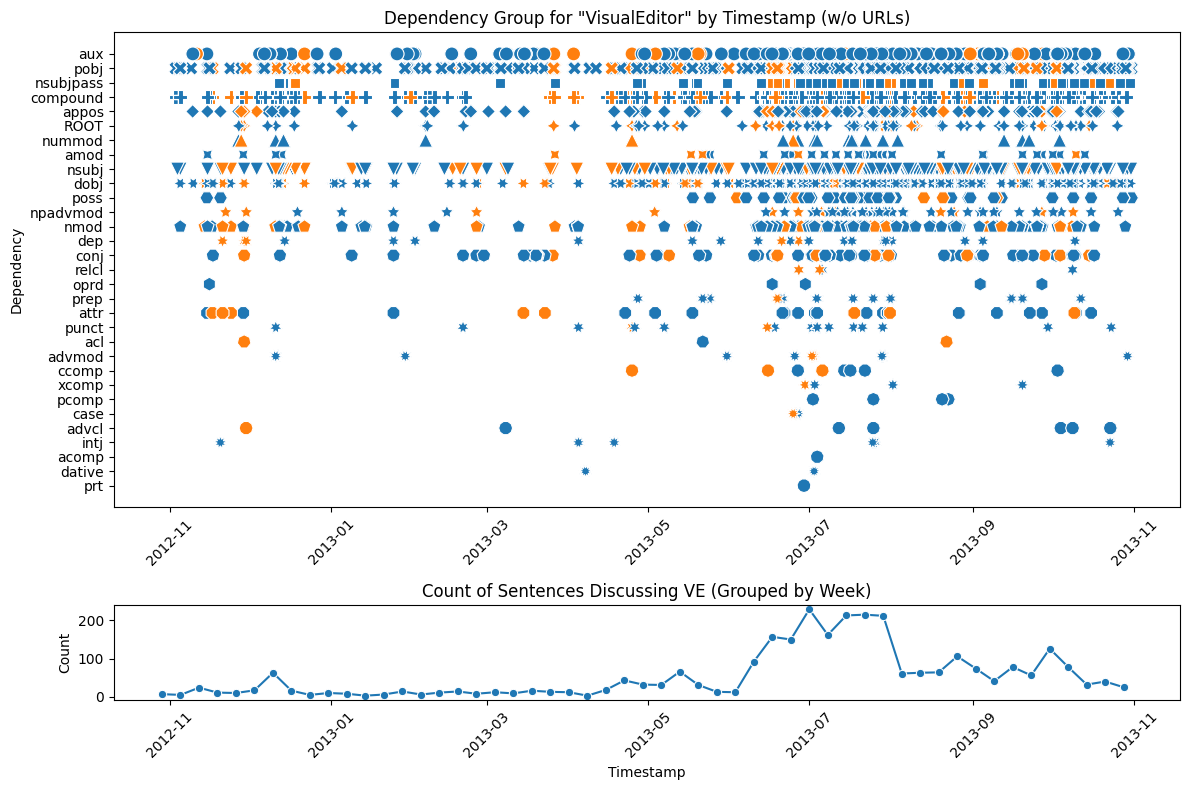

In [18]:
plt.figure(figsize=(12, 8))
gs = GridSpec(2, 1, height_ratios=[5, 1])

# Main plot: Dependency groups by timestamp
ax0 = plt.subplot(gs[0])
sns.scatterplot(data=filtered_dependencies, x='timestamp', y='dependency', hue='wmfAffil', style='dependency', markers=True, s=100, ax=ax0)
ax0.set_title('Dependency Group for "VisualEditor" by Timestamp (w/o URLs)')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45)
#ax0.set_xticklabels([])
ax0.set_xlabel('')
ax0.set_ylabel('Dependency')
#ax0.legend(title='Dependency', bbox_to_anchor=(1, 1), loc='upper left')
ax0.legend().set_visible(False)

# Secondary plot: Overall count of sentences over time
ax1 = plt.subplot(gs[1], sharex=ax0)
filtered_dependencies['week'] = filtered_dependencies['timestamp'].dt.to_period('W').dt.start_time
weekly_comment_counts = filtered_dependencies.groupby('week')['comment_id'].nunique()
sns.lineplot(x=weekly_comment_counts.index, y=weekly_comment_counts.values, ax=ax1, marker='o')
ax1.set_title('Count of Sentences Discussing VE (Grouped by Week)')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Count')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipykernel_19414/3977280642.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  task_phab_df['week'] = task_phab_df['timestamp'].dt.to_period('W').dt.start_time
/tmp/ipykernel_19414/3977280642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task_phab_df['week'] = task_phab_df['timestamp'].dt.to_period('W').dt.start_time


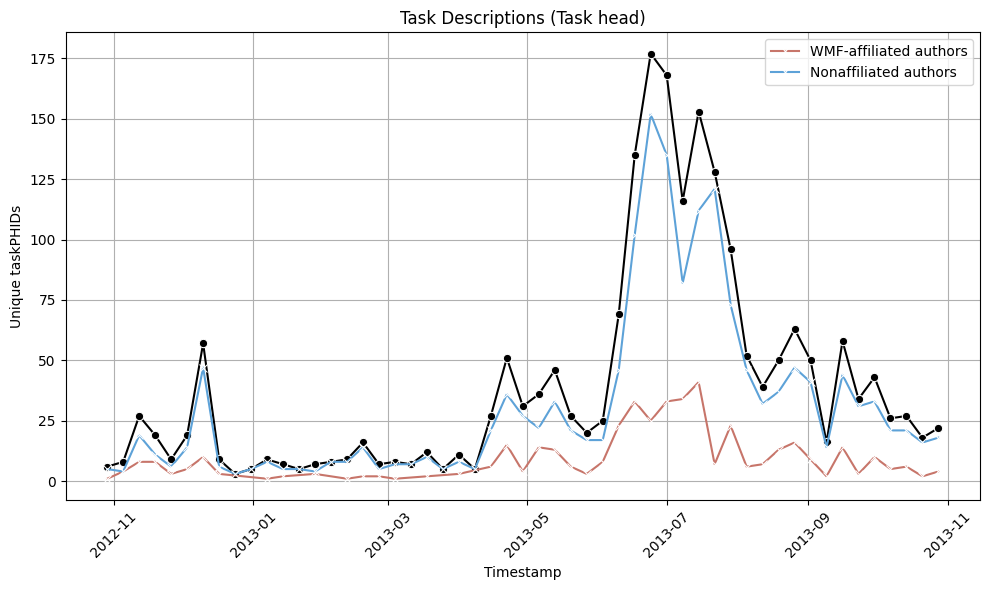

9816

In [21]:
plt.figure(figsize=(10, 6))
task_phab_df = filtered_phab_df[filtered_phab_df['comment_type']=="task_description"]
task_phab_df['week'] = task_phab_df['timestamp'].dt.to_period('W').dt.start_time
unique_taskPHIDs = task_phab_df.groupby('week')['TaskPHID'].nunique()

wmf_task_phab_df = task_phab_df[task_phab_df['WMFaffil'] == True]
wmf_tasks = wmf_task_phab_df.groupby('week')['TaskPHID'].nunique()

other_task_phab_df = task_phab_df[task_phab_df['WMFaffil'] != True]
other_tasks = other_task_phab_df.groupby('week')['TaskPHID'].nunique()

sns.lineplot(x=unique_taskPHIDs.index, y=unique_taskPHIDs.values, color='black', marker='o')
sns.lineplot(x=wmf_tasks.index, y=wmf_tasks.values, color='#c7756a', label='WMF-affiliated authors', marker='x')
sns.lineplot(x=other_tasks.index, y=other_tasks.values, color='#5da2d8', label='Nonaffiliated authors', marker='x')
plt.title('Task Descriptions (Task head)')
plt.xlabel('Timestamp')
plt.ylabel('Unique taskPHIDs')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#len(filtered_phab_df[filtered_phab_df['TaskPHID'].isin(task_phab_df['TaskPHID'])])

/tmp/ipykernel_56151/825633528.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  filtered_dependencies['week'] = filtered_dependencies['timestamp'].dt.to_period('W').dt.start_time
/tmp/ipykernel_56151/825633528.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dependencies['week'] = filtered_dependencies['timestamp'].dt.to_period('W').dt.start_time


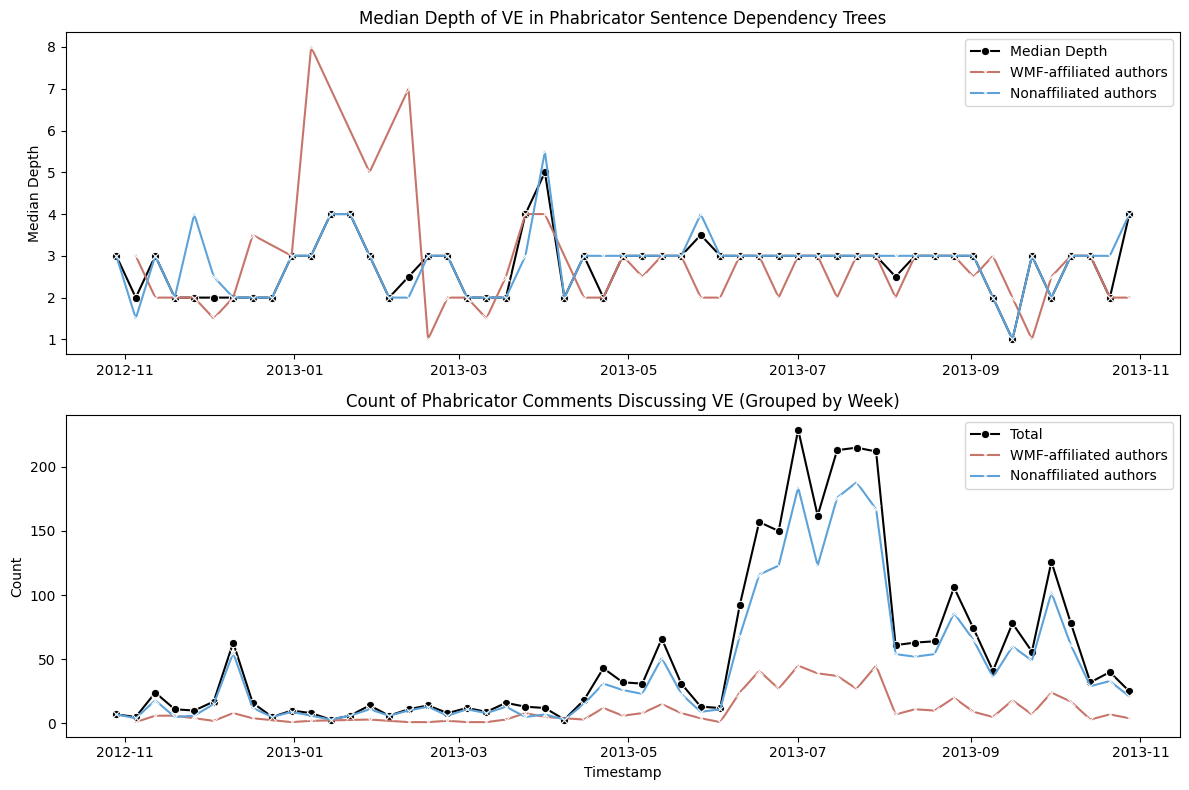

<Figure size 640x480 with 0 Axes>

In [29]:
plt.figure(figsize=(12, 8))
gs = GridSpec(2, 1, height_ratios=[6, 6])

# Main plot: Token depth by timestamp
'''
ax0 = plt.subplot(gs[0])
sns.scatterplot(data=filtered_dependencies, x='timestamp', y='dependency', hue='wmfAffil', style='dependency', markers=True, s=100, ax=ax0)
ax0.set_title('VE Depth by Timestamp w/o URLS')
ax0.set_xlabel('')
ax0.set_ylabel('Dependency Type')
ax0.legend().set_visible(False)
'''
# Calculate the median depth over time
filtered_dependencies['week'] = filtered_dependencies['timestamp'].dt.to_period('W').dt.start_time
median_depth = filtered_dependencies.groupby('week')['depth'].median().reset_index()

wmf_filtered_dependencies = filtered_dependencies[filtered_dependencies['wmfAffil'] == True]
wmf_median_depth = wmf_filtered_dependencies.groupby('week')['depth'].median().reset_index()

other_filtered_dependencies = filtered_dependencies[filtered_dependencies['wmfAffil'] != True]
other_median_depth = other_filtered_dependencies.groupby('week')['depth'].median().reset_index()

# Plot the median depth over time
ax0 = plt.subplot(gs[0])
sns.lineplot(data=median_depth, x='week', y='depth', ax=ax0, color='black', label='Median Depth', marker='o')
sns.lineplot(data=wmf_median_depth, x='week', y='depth', ax=ax0, color='#c7756a', label='WMF-affiliated authors', marker='x')
sns.lineplot(data=other_median_depth, x='week', y='depth', ax=ax0, color='#5da2d8', label='Nonaffiliated authors', marker='x')
ax0.set_title('Median Depth of VE in Phabricator Sentence Dependency Trees')
ax0.set_ylabel('Median Depth')
ax0.set_xlabel('')

# Secondary plot: Overall count of sentences over time
ax2 = plt.subplot(gs[1], sharex=ax0)
#filtered_dependencies['week'] = filtered_dependencies['timestamp'].dt.to_period('W').dt.start_time
weekly_comment_counts = filtered_dependencies.groupby('week')['comment_id'].nunique()
sns.lineplot(x=weekly_comment_counts.index, y=weekly_comment_counts.values, color='black', label='Total', ax=ax2, marker='o')
wmf_weekly_comment_counts = wmf_filtered_dependencies.groupby('week')['comment_id'].nunique()
sns.lineplot(x=wmf_weekly_comment_counts.index, y=wmf_weekly_comment_counts.values, color='#c7756a', label='WMF-affiliated authors', ax=ax2, marker='x')
other_weekly_comment_counts = other_filtered_dependencies.groupby('week')['comment_id'].nunique()
sns.lineplot(x=other_weekly_comment_counts.index, y=other_weekly_comment_counts.values, color='#5da2d8', label='Nonaffiliated authors', ax=ax2, marker='x')
ax2.set_title('Count of Phabricator Comments Discussing VE (Grouped by Week)')
ax2.set_xlabel('Timestamp')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

plt.savefig('030525_ve_phab_comments.png')

In [13]:
bot_filtered_sentence_level_data = sentence_level_data[sentence_level_data['has_bot_ref'] == True]
bot_filtered_sentence_level_data['dependency_tree'] = bot_filtered_sentence_level_data['sentence_no_url'].apply(extract_dependency_tree)

/tmp/ipykernel_97550/2055267856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_filtered_sentence_level_data['dependency_tree'] = bot_filtered_sentence_level_data['sentence_no_url'].apply(extract_dependency_tree)


In [19]:
bot_dependency_relations = []

for index, row in bot_filtered_sentence_level_data.iterrows():
    sentence = row['sentence']
    timestamp = row['timestamp']
    comment_id = row['comment_id']
    sentence_id = row['sentence_id']
    
    for token, dep, head, ancestors, subtree, children in row['dependency_tree']:
        if re.search(r'\b(bots|scripts|gadgets)\b', token, re.IGNORECASE):
            bot_dependency_relations.append({
                'sentence_id': sentence_id,
                'comment_id': comment_id,
                'timestamp': timestamp,
                'token': token,
                'dependency': dep,
                'head': head, 
                'depth': len(list(ancestors)), 
                'children': len(list(children)) 
            })
            
bot_dependency_relations_df = pd.DataFrame(bot_dependency_relations)

In [20]:
bot_dependency_relations_df

sentence_id  comment_id                 timestamp  \
0              5         730 2013-10-03 20:32:16+00:00   
1              1        3948 2013-10-25 23:44:17+00:00   
2              2        3948 2013-10-25 23:44:17+00:00   
3              4        3963 2013-10-04 15:10:00+00:00   
4              4        3963 2013-10-04 15:10:00+00:00   
..           ...         ...                       ...   
175            2       29956 2013-03-15 11:27:23+00:00   
176            6       30140 2013-06-20 20:09:44+00:00   
177            3       31749 2013-08-07 13:35:56+00:00   
178            6       31907 2013-06-30 19:20:13+00:00   
179            8       31907 2013-06-30 19:20:13+00:00   

                                                 token dependency       head  \
0                                              scripts       pobj         in   
1                                              gadgets       dobj       load   
2                                              gadgets      nsubj      reach   
3    load.php?debug=false&lang=en&modules=jquery%2C...   compound  Exception   
4    load.php?debug=false&lang=en&modules=jquery%2C...   compound  Exception   
..                                                 ...        ...        ...   
175                                               bots  nsubjpass     voiced   
176                                            scripts       pobj        For   
177                                            scripts       attr         be   
178                                            gadgets       dobj    support   
179                                            gadgets       dobj    support   

     depth  children  
0        3         2  
1        3         1  
2        1         0  
3        4         1  
4        4         2  
..     ...       ...  
175      1         2  
176      2         2  
177      3         4  
178      3         0  
179      3         0  

[180 rows x 8 columns]

/tmp/ipykernel_83107/353490988.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45)
/tmp/ipykernel_83107/353490988.py:17: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bot_dependency_relations_df['week'] = bot_dependency_relations_df['timestamp'].dt.to_period('W').dt.start_time
/tmp/ipykernel_83107/353490988.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


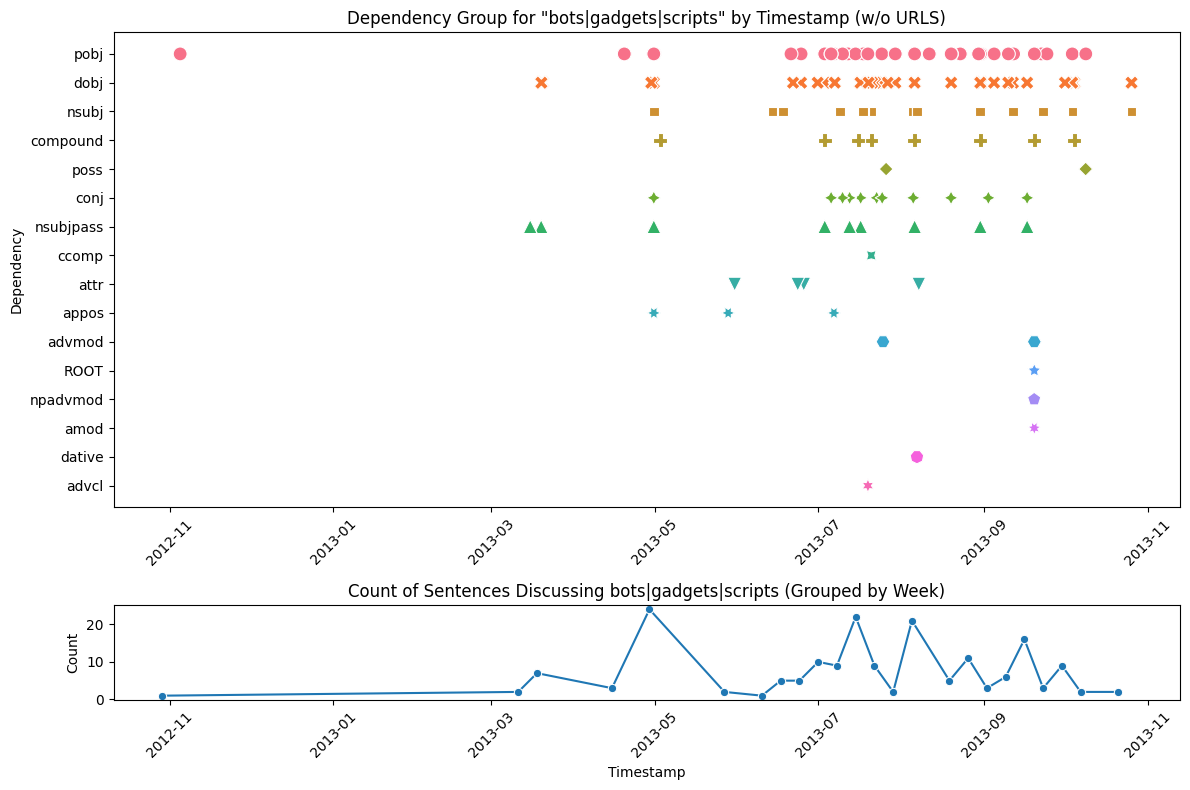

In [57]:
plt.figure(figsize=(12, 8))
gs = GridSpec(2, 1, height_ratios=[5, 1])

# Main plot: Dependency groups by timestamp
ax0 = plt.subplot(gs[0])
sns.scatterplot(data=bot_dependency_relations_df, x='timestamp', y='dependency', hue='dependency', style='dependency', markers=True, s=100, ax=ax0)
ax0.set_title('Dependency Group for "bots|gadgets|scripts" by Timestamp (w/o URLS)')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45)
#ax0.set_xticklabels([])
ax0.set_xlabel('')
ax0.set_ylabel('Dependency')
#ax0.legend(title='Dependency', bbox_to_anchor=(1, 1), loc='upper left')
ax0.legend().set_visible(False)

# Secondary plot: Overall count of sentences over time
ax1 = plt.subplot(gs[1], sharex=ax0)
bot_dependency_relations_df['week'] = bot_dependency_relations_df['timestamp'].dt.to_period('W').dt.start_time
weekly_counts = bot_dependency_relations_df['week'].value_counts().sort_index()
sns.lineplot(x=weekly_counts.index, y=weekly_counts.values, ax=ax1, marker='o')
ax1.set_title('Count of Sentences Discussing bots|gadgets|scripts (Grouped by Week)')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Count')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipykernel_97550/331759571.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45)
/tmp/ipykernel_97550/331759571.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bot_dependency_relations_df['week'] = bot_dependency_relations_df['timestamp'].dt.to_period('W').dt.start_time
/tmp/ipykernel_97550/331759571.py:23: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bot_dependency_relations_df['week'] = bot_dependency_relations_df['timestamp'].dt.to_period('W').dt.start_time
/tmp/ipykernel_97550/331759571.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


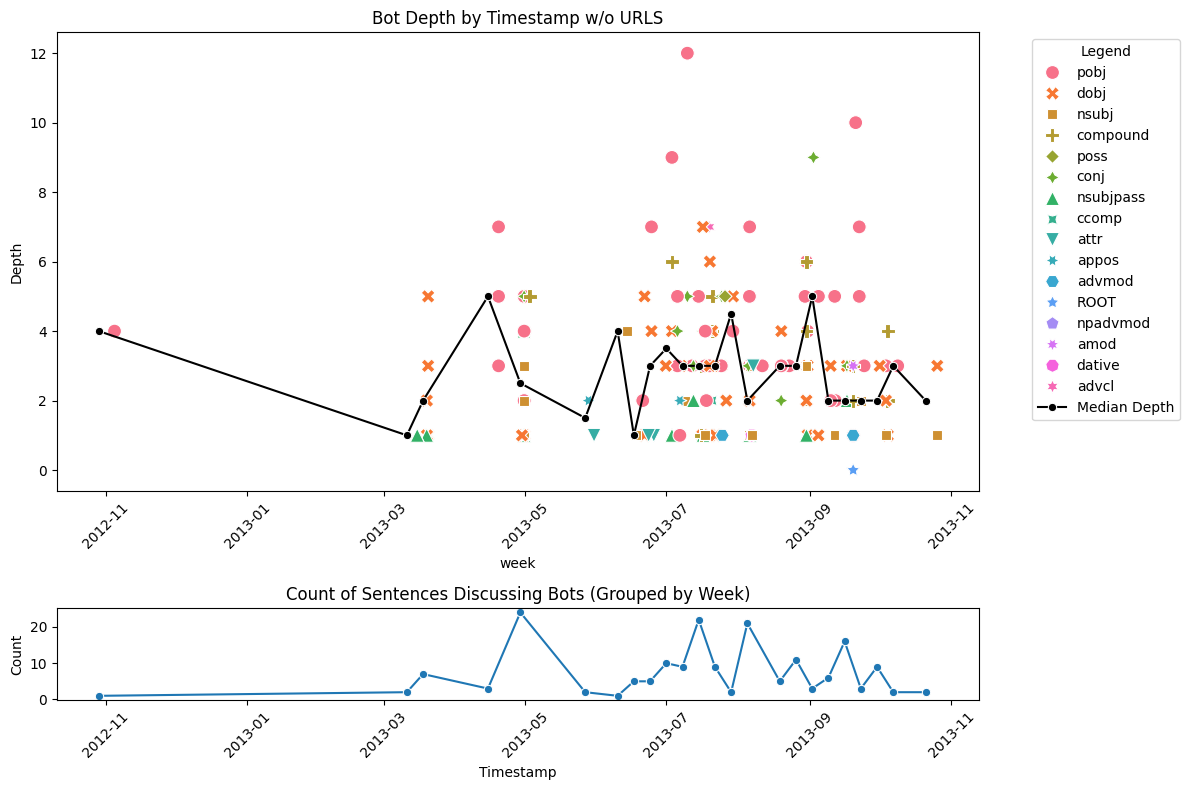

In [21]:
plt.figure(figsize=(12, 8))
gs = GridSpec(2, 1, height_ratios=[5, 1])

# Main plot: Token depth by timestamp
ax0 = plt.subplot(gs[0])
sns.scatterplot(data=bot_dependency_relations_df, x='timestamp', y='depth', hue='dependency', style='dependency', markers=True, s=100, ax=ax0)
ax0.set_title('Bot Depth by Timestamp w/o URLS')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45)
ax0.set_xlabel('')
ax0.set_ylabel('Depth')
#ax0.legend().set_visible(False)

# Calculate the median depth over time
bot_dependency_relations_df['week'] = bot_dependency_relations_df['timestamp'].dt.to_period('W').dt.start_time
median_depth = bot_dependency_relations_df.groupby('week')['depth'].median().reset_index()

# Plot the median depth over time
sns.lineplot(data=median_depth, x='week', y='depth', ax=ax0, color='black', label='Median Depth', marker='o')
ax0.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

# Secondary plot: Overall count of sentences over time
ax1 = plt.subplot(gs[1], sharex=ax0)
bot_dependency_relations_df['week'] = bot_dependency_relations_df['timestamp'].dt.to_period('W').dt.start_time
weekly_counts = bot_dependency_relations_df['week'].value_counts().sort_index()
sns.lineplot(x=weekly_counts.index, y=weekly_counts.values, ax=ax1, marker='o')
ax1.set_title('Count of Sentences Discussing Bots (Grouped by Week)')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Count')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [22]:
sentence_level_data['dependency_tree'] = sentence_level_data['sentence_no_url'].apply(extract_dependency_tree)


In [23]:
wmf_dependency_relations = []

for index, row in sentence_level_data.iterrows():
    sentence = row['sentence']
    timestamp = row['timestamp']
    comment_id = row['comment_id']
    sentence_id = row['sentence_id']
    
    for token, dep, head, ancestors, subtree, children in row['dependency_tree']:
        if re.search(r'\b(wmf|Wikimedia|Foundation|staff| wikimedia foundation)\b', token, re.IGNORECASE):
            wmf_dependency_relations.append({
                'sentence_id': sentence_id,
                'comment_id': comment_id,
                'timestamp': timestamp,
                'token': token,
                'dependency': dep,
                'head': head, 
                'depth': len(list(ancestors)), 
                'children': len(list(children)) 
            })
            
wmf_dependency_relations_df = pd.DataFrame(wmf_dependency_relations)

In [24]:
wmf_dependency_relations_df

sentence_id  comment_id                 timestamp      token dependency  \
0              2         747 2013-09-28 15:44:00+00:00        WMF      nsubj   
1              5         750 2013-09-30 23:29:57+00:00  Wikimedia   compound   
2              2         752 2013-09-30 07:16:14+00:00        WMF      appos   
3              2         753 2013-09-28 19:11:06+00:00  Wikimedia   compound   
4              2        1050 2013-06-27 00:46:02+00:00        WMF       pobj   
..           ...         ...                       ...        ...        ...   
431            3       32254 2013-10-07 02:30:30+00:00  Wikimedia   compound   
432            1       32256 2013-10-07 00:58:28+00:00        wmf   compound   
433            1       32257 2013-10-07 00:44:40+00:00        WMF   compound   
434            2       32258 2013-10-07 00:38:54+00:00        WMF       amod   
435            2       32258 2013-10-07 00:38:54+00:00        WMF   compound   

      head  depth  children  
0    comes      1         1  
1     wiki      4         0  
2      You      4         0  
3     wiki      3         0  
4       at      2         0  
..     ...    ...       ...  
431  wikis      8         0  
432   wiki      5         0  
433   wiki      3         0  
434  wikis      3         0  
435   wiki      3         0  

[436 rows x 8 columns]

/tmp/ipykernel_83107/998074097.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45)
/tmp/ipykernel_83107/998074097.py:17: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  wmf_dependency_relations_df['week'] = wmf_dependency_relations_df['timestamp'].dt.to_period('W').dt.start_time
/tmp/ipykernel_83107/998074097.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


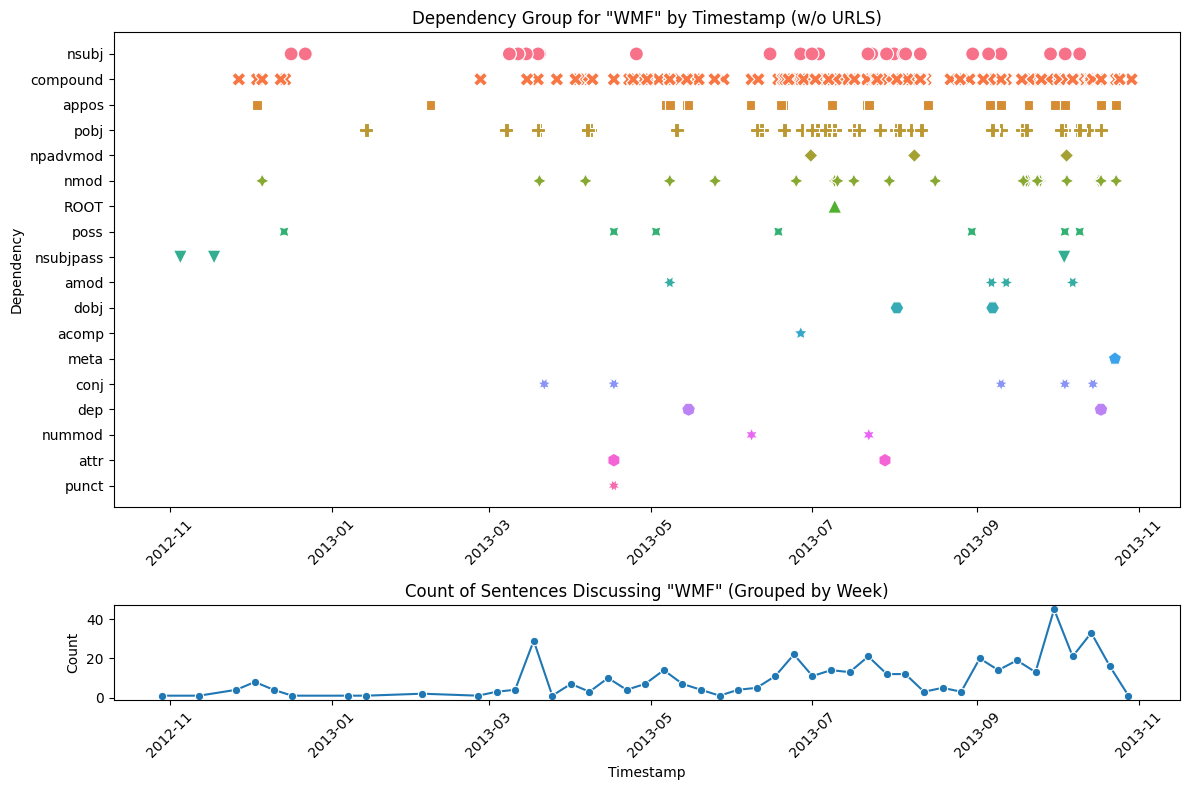

In [84]:
plt.figure(figsize=(12, 8))
gs = GridSpec(2, 1, height_ratios=[5, 1])

# Main plot: Dependency groups by timestamp
ax0 = plt.subplot(gs[0])
sns.scatterplot(data=wmf_dependency_relations_df, x='timestamp', y='dependency', hue='dependency', style='dependency', markers=True, s=100, ax=ax0)
ax0.set_title('Dependency Group for "WMF" by Timestamp (w/o URLS)')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45)
#ax0.set_xticklabels([])
ax0.set_xlabel('')
ax0.set_ylabel('Dependency')
#ax0.legend(title='Dependency', bbox_to_anchor=(1, 1), loc='upper left')
ax0.legend().set_visible(False)

# Secondary plot: Overall count of sentences over time
ax1 = plt.subplot(gs[1], sharex=ax0)
wmf_dependency_relations_df['week'] = wmf_dependency_relations_df['timestamp'].dt.to_period('W').dt.start_time
weekly_counts = wmf_dependency_relations_df['week'].value_counts().sort_index()
sns.lineplot(x=weekly_counts.index, y=weekly_counts.values, ax=ax1, marker='o')
ax1.set_title('Count of Sentences Discussing "WMF" (Grouped by Week)')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Count')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipykernel_97550/4168321775.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45)
/tmp/ipykernel_97550/4168321775.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  wmf_dependency_relations_df['week'] = wmf_dependency_relations_df['timestamp'].dt.to_period('W').dt.start_time
/tmp/ipykernel_97550/4168321775.py:23: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  wmf_dependency_relations_df['week'] = wmf_dependency_relations_df['timestamp'].dt.to_period('W').dt.start_time
/tmp/ipykernel_97550/4168321775.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


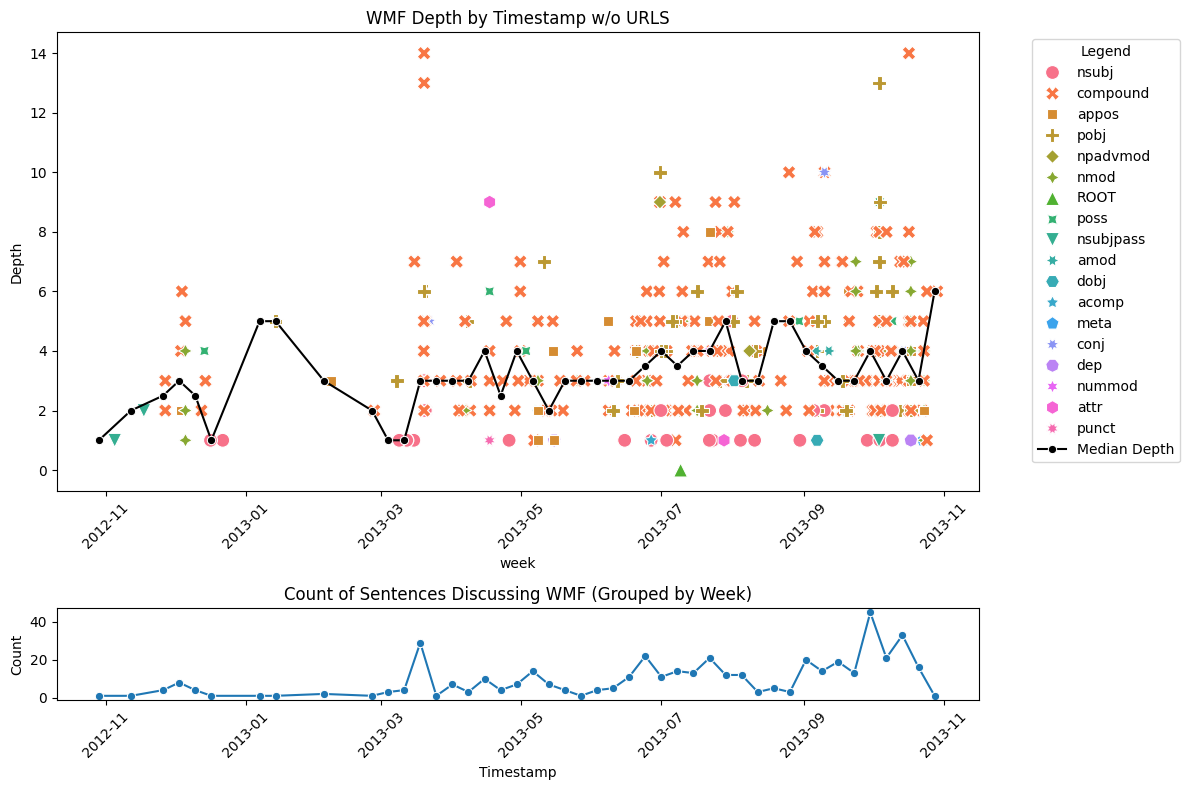

In [26]:
plt.figure(figsize=(12, 8))
gs = GridSpec(2, 1, height_ratios=[5, 1])

# Main plot: Token depth by timestamp
ax0 = plt.subplot(gs[0])
sns.scatterplot(data=wmf_dependency_relations_df, x='timestamp', y='depth', hue='dependency', style='dependency', markers=True, s=100, ax=ax0)
ax0.set_title('WMF Depth by Timestamp w/o URLS')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45)
ax0.set_xlabel('')
ax0.set_ylabel('Depth')
#ax0.legend().set_visible(False)

# Calculate the median depth over time
wmf_dependency_relations_df['week'] = wmf_dependency_relations_df['timestamp'].dt.to_period('W').dt.start_time
median_depth = wmf_dependency_relations_df.groupby('week')['depth'].median().reset_index()

# Plot the median depth over time
sns.lineplot(data=median_depth, x='week', y='depth', ax=ax0, color='black', label='Median Depth', marker='o')
ax0.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

# Secondary plot: Overall count of sentences over time
ax1 = plt.subplot(gs[1], sharex=ax0)
wmf_dependency_relations_df['week'] = wmf_dependency_relations_df['timestamp'].dt.to_period('W').dt.start_time
weekly_counts = wmf_dependency_relations_df['week'].value_counts().sort_index()
sns.lineplot(x=weekly_counts.index, y=weekly_counts.values, ax=ax1, marker='o')
ax1.set_title('Count of Sentences Discussing WMF (Grouped by Week)')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Count')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()